<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/ConcentricCir1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [102]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/2.concerticcir1.csv",header=None)

In [103]:
data.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


No null values

In [105]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

Balanced dataset

In [106]:
data.shape

(100, 3)

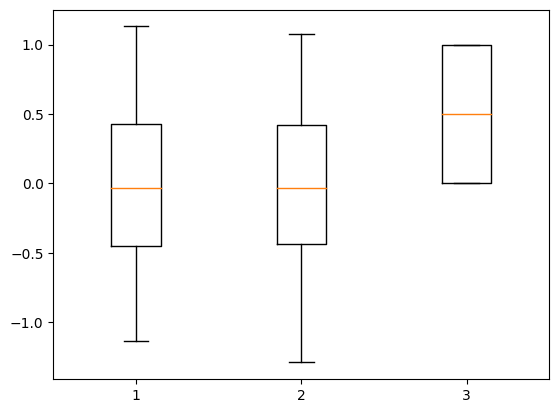

In [107]:
plt.boxplot(data)
plt.show()

No Outliers

In [108]:
x = data[[0,1]]
y = data[2]

In [109]:
y = y.astype(int)

Output needs to be int for comparision with predicted output

> Indented block



In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [111]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((80, 2), (20, 2), 80, 20)

In [112]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

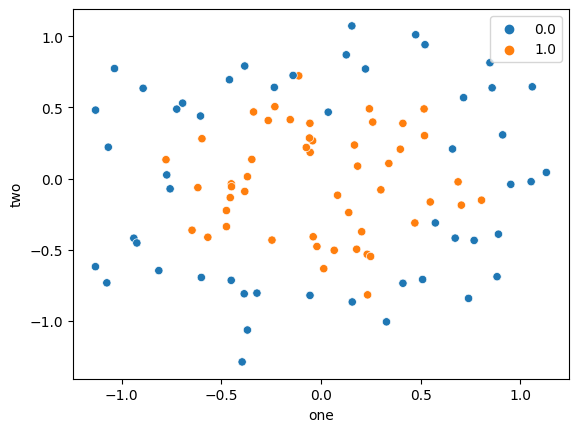

In [113]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [114]:
model=Sequential()
model.add(Dense(5,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 15        
                                                                 
 dense_15 (Dense)            (None, 3)                 18        
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


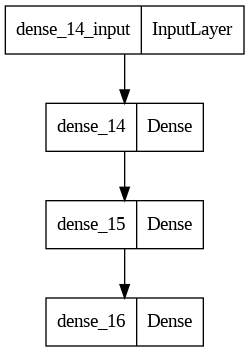

In [116]:
plot_model(model)

In [117]:
model.layers[0].get_weights()

[array([[ 0.8216051 , -0.78488535, -0.3142236 ,  0.05993426, -0.26751924],
        [ 0.6780982 , -0.1292699 , -0.6282861 ,  0.42878962,  0.07792151]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [118]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [119]:
history = model.fit(x_train,y_train,batch_size=1,epochs=100,validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 0.6942 - accuracy: 0.5781 - val_loss: 0.6735 - val_accuracy: 0.5000
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5625 - val_loss: 0.6756 - val_accuracy: 0.5000
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5625 - val_loss: 0.6764 - val_accuracy: 0.4375
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5625 - val_loss: 0.6779 - val_accuracy: 0.4375
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5781 - val_loss: 0.6787 - val_accuracy: 0.4375
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5625 - val_loss: 0.6789 - val_accuracy: 0.4375
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5625 - val_loss: 0.6778 - val_accuracy: 0.4375
Epoch 8/100
6

In [120]:
model.layers[0].get_weights()

[array([[ 0.8553942 , -0.56926954, -0.4625786 , -0.45462304, -0.55180085],
        [ 0.58560157,  0.3996789 , -1.397854  ,  0.56718177,  0.47495553]],
       dtype=float32),
 array([0.86390686, 0.12522   , 1.2886394 , 0.32636946, 0.08318824],
       dtype=float32)]

In [121]:
predict = np.where(model.predict(x_test)>0.5,1,0)

1/1 [==============================] - 0s 61ms/step


In [122]:
accuracy_score(y_test,predict)

0.8

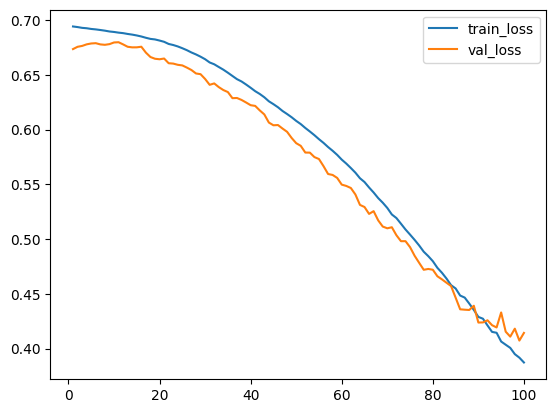

In [123]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

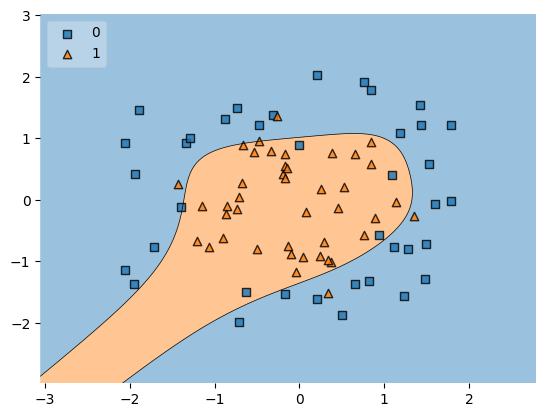

In [124]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

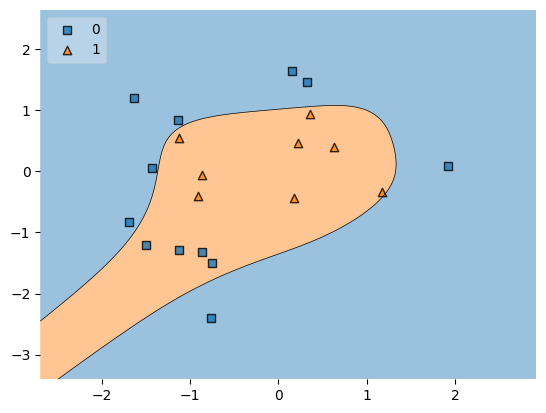

In [125]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)